In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import torch

def safe_float_conversion(data):
    try:
        return data.astype(float)
    except ValueError:
        # Handle or log the exception if needed
        return data

def recursively_convert_to_float(data):
    # Check if data is a numpy array (which includes structured arrays and nested arrays)
    if isinstance(data, np.ndarray):
        if data.dtype == 'O':  # For object type arrays, iterate over each element
            return np.array([recursively_convert_to_float(item.squeeze()) for item in data], dtype=float)
        else:  # Directly convert to float for other numeric types
            return data.astype(float)
    else:  # Base case for non-array data
        return float(data)

In [2]:
exp_mat = scipy.io.loadmat(f'/pscratch/sd/z/zhantao/inxs_steering_production/mat_data/Data_folded260meV werr.mat')

In [3]:
exp_mat['data'][0,0].dtype

dtype([('alatt', 'O'), ('angdeg', 'O'), ('uoffset', 'O'), ('u_to_rlu', 'O'), ('ulen', 'O'), ('p', 'O'), ('s', 'O'), ('e', 'O'), ('npix', 'O')])

In [4]:
flattened_data = exp_mat['data'][0][0].copy()

In [8]:
dict_out = {}

for name in flattened_data.dtype.names:
    if name == 's':
        dict_out['S'] = torch.from_numpy(flattened_data[name].astype(float))
    elif name == 'e':
        dict_out['E'] = torch.from_numpy(flattened_data[name].astype(float))
    elif name == 'p':
        dict_out['grid'] = {}
        for _key, _array in zip(['h_grid', 'k_grid', 'l_grid', 'w_grid'], flattened_data[name][0]):
            dict_out['grid'][_key] = torch.from_numpy((_array.astype(float)[:-1] + _array.astype(float)[1:]).squeeze() / 2)

In [14]:
valid_E = dict_out['E']>0

In [24]:
counts = (dict_out['S'] / (dict_out['E'] + 1e-6)).pow(2)

In [30]:
counts.max()

tensor(9687.0800, dtype=torch.float64)

In [31]:
counts.sum()

tensor(1.9405e+08, dtype=torch.float64)

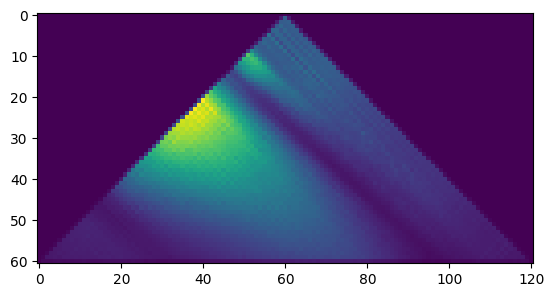

In [ ]:
plt.imshow(counts.sum(-1).sum(-1))

In [18]:
dict_out['S'][valid_E].mean()


tensor(3.9800, dtype=torch.float64)